# 1. Load Dataset: 

In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath("../../src"))

In [2]:
# Python Class defined in src
from ilab_group_12_1_fall_detection.classification_algorithms import ClassificationAlgorithms, accuracy_score

In [3]:
df = pd.read_pickle("../../data/processed/features_df_59.pkl")

In [4]:
df

,mean_acc_x,mean_acc_y,mean_acc_z,mean_gyro_x,mean_gyro_y,mean_gyro_z,std_acc_x,std_acc_y,std_acc_z,std_gyro_x,...,acc_mag_min,acc_mag_max,acc_mag_diff,acc_mag_energy_entropy,gyro_mag_mean,gyro_mag_std,gyro_mag_min,gyro_mag_max,gyro_mag_diff,label
0,0.253800,-9.735710,-0.759319,-0.052844,0.018417,0.029541,0.245499,0.014139,0.217480,0.028723,...,9.735512,9.809990,0.074478,3.321924,0.090548,0.039731,0.028844,0.229268,0.200424,STD
1,0.249150,-9.739145,-0.733451,-0.032854,0.029329,0.011645,0.237170,0.014339,0.232159,0.031158,...,9.738685,9.809990,0.071305,3.321922,0.072513,0.046496,0.019905,0.229268,0.209363,STD
2,0.386838,-9.739573,-0.578832,-0.036421,0.003834,0.016446,0.146762,0.013975,0.088793,0.026637,...,9.730387,9.785563,0.055175,3.321926,0.056273,0.017656,0.019905,0.092863,0.072958,STD
3,0.326125,-9.741381,-0.672142,-0.049490,0.001070,0.023786,0.055841,0.011643,0.079863,0.007339,...,9.730387,9.790438,0.060051,3.321926,0.059128,0.011383,0.044413,0.092863,0.048451,STD
4,0.283808,-9.745207,-0.738642,-0.042550,0.012788,0.018867,0.027931,0.008566,0.040782,0.005152,...,9.762408,9.792928,0.030519,3.321927,0.049011,0.005093,0.039530,0.058386,0.018856,STD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69978,5.822824,-1.556491,7.235764,-0.066575,0.083216,-0.058658,1.872333,0.572352,1.382859,0.357383,...,3.617510,12.013304,8.395794,3.296561,0.490682,0.574643,0.027853,2.293158,2.265304,SIT
69979,6.218721,-2.150890,6.742830,0.040020,0.044249,0.119265,1.445265,0.697573,1.440475,0.306958,...,8.646267,10.517353,1.871086,3.319196,0.425943,0.440300,0.027853,1.416272,1.388418,CSO
69980,6.294121,-0.479762,5.933423,0.127804,0.004355,-0.142396,1.834981,4.135841,1.116061,0.857453,...,5.389208,12.161697,6.772488,3.314004,1.127563,0.727587,0.040854,2.398200,2.357346,CSO
69981,4.271851,5.092304,3.382345,0.320573,-0.384789,-0.601700,2.281468,5.606993,3.181307,1.035809,...,5.289488,13.113264,7.823775,3.252006,1.482418,1.146300,0.133865,4.501683,4.367818,STD


In [5]:
df.columns

Index(['mean_acc_x', 'mean_acc_y', 'mean_acc_z', 'mean_gyro_x', 'mean_gyro_y',
       'mean_gyro_z', 'std_acc_x', 'std_acc_y', 'std_acc_z', 'std_gyro_x',
       'std_gyro_y', 'std_gyro_z', 'min_acc_x', 'min_acc_y', 'min_acc_z',
       'min_gyro_x', 'min_gyro_y', 'min_gyro_z', 'max_acc_x', 'max_acc_y',
       'max_acc_z', 'max_gyro_x', 'max_gyro_y', 'max_gyro_z', 'skew_acc_x',
       'skew_acc_y', 'skew_acc_z', 'skew_gyro_x', 'skew_gyro_y', 'skew_gyro_z',
       'kurt_acc_x', 'kurt_acc_y', 'kurt_acc_z', 'kurt_gyro_x', 'kurt_gyro_y',
       'kurt_gyro_z', 'acc_x_range', 'acc_y_range', 'acc_z_range',
       'gyro_x_range', 'gyro_y_range', 'gyro_z_range', 'acc_slope',
       'tilt_mean', 'tilt_std', 'tilt_skew', 'tilt_kurt', 'acc_mag_mean',
       'acc_mag_std', 'acc_mag_min', 'acc_mag_max', 'acc_mag_diff',
       'acc_mag_energy_entropy', 'gyro_mag_mean', 'gyro_mag_std',
       'gyro_mag_min', 'gyro_mag_max', 'gyro_mag_diff', 'label'],
      dtype='object')

# 2. Data Splitting

In [6]:
X = df.drop("label", axis =1)
y = df["label"]

In [7]:
X.head()

,mean_acc_x,mean_acc_y,mean_acc_z,mean_gyro_x,mean_gyro_y,mean_gyro_z,std_acc_x,std_acc_y,std_acc_z,std_gyro_x,...,acc_mag_std,acc_mag_min,acc_mag_max,acc_mag_diff,acc_mag_energy_entropy,gyro_mag_mean,gyro_mag_std,gyro_mag_min,gyro_mag_max,gyro_mag_diff
0,0.253800,-9.735710,-0.759319,-0.052844,0.018417,0.029541,0.245499,0.014139,0.217480,0.028723,...,0.018428,9.735512,9.809990,0.074478,3.321924,0.090548,0.039731,0.028844,0.229268,0.200424
1,0.249150,-9.739145,-0.733451,-0.032854,0.029329,0.011645,0.237170,0.014339,0.232159,0.031158,...,0.017245,9.738685,9.809990,0.071305,3.321922,0.072513,0.046496,0.019905,0.229268,0.209363
2,0.386838,-9.739573,-0.578832,-0.036421,0.003834,0.016446,0.146762,0.013975,0.088793,0.026637,...,0.013394,9.730387,9.785563,0.055175,3.321926,0.056273,0.017656,0.019905,0.092863,0.072958
3,0.326125,-9.741381,-0.672142,-0.049490,0.001070,0.023786,0.055841,0.011643,0.079863,0.007339,...,0.012675,9.730387,9.790438,0.060051,3.321926,0.059128,0.011383,0.044413,0.092863,0.048451
4,0.283808,-9.745207,-0.738642,-0.042550,0.012788,0.018867,0.027931,0.008566,0.040782,0.005152,...,0.007819,9.762408,9.792928,0.030519,3.321927,0.049011,0.005093,0.039530,0.058386,0.018856


In [8]:
y

0        STD
1        STD
2        STD
3        STD
4        STD
        ... 
69978    SIT
69979    CSO
69980    CSO
69981    STD
69982    STD
Name: label, Length: 69983, dtype: object

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Split with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

In [11]:
y_train.value_counts()

label
STD    16498
WAL    16408
SIT     4008
JOG     3834
JUM     3729
LYI     3404
STU     2211
STN     1991
CSO     1050
CSI      971
SCH      474
BSC      375
SDL      326
FKL      281
FOL      259
CHU      167
Name: count, dtype: int64

In [12]:
y_test.value_counts()

label
STD    4124
WAL    4102
SIT    1002
JOG     959
JUM     932
LYI     851
STU     553
STN     498
CSO     263
CSI     243
SCH     118
BSC      94
SDL      82
FKL      70
FOL      64
CHU      42
Name: count, dtype: int64

In [13]:
X.columns

Index(['mean_acc_x', 'mean_acc_y', 'mean_acc_z', 'mean_gyro_x', 'mean_gyro_y',
       'mean_gyro_z', 'std_acc_x', 'std_acc_y', 'std_acc_z', 'std_gyro_x',
       'std_gyro_y', 'std_gyro_z', 'min_acc_x', 'min_acc_y', 'min_acc_z',
       'min_gyro_x', 'min_gyro_y', 'min_gyro_z', 'max_acc_x', 'max_acc_y',
       'max_acc_z', 'max_gyro_x', 'max_gyro_y', 'max_gyro_z', 'skew_acc_x',
       'skew_acc_y', 'skew_acc_z', 'skew_gyro_x', 'skew_gyro_y', 'skew_gyro_z',
       'kurt_acc_x', 'kurt_acc_y', 'kurt_acc_z', 'kurt_gyro_x', 'kurt_gyro_y',
       'kurt_gyro_z', 'acc_x_range', 'acc_y_range', 'acc_z_range',
       'gyro_x_range', 'gyro_y_range', 'gyro_z_range', 'acc_slope',
       'tilt_mean', 'tilt_std', 'tilt_skew', 'tilt_kurt', 'acc_mag_mean',
       'acc_mag_std', 'acc_mag_min', 'acc_mag_max', 'acc_mag_diff',
       'acc_mag_energy_entropy', 'gyro_mag_mean', 'gyro_mag_std',
       'gyro_mag_min', 'gyro_mag_max', 'gyro_mag_diff'],
      dtype='object')

# 3. Features assessment

In [14]:
# Split features

stat_features = ['mean_acc_x', 'mean_acc_y', 'mean_acc_z', 'mean_gyro_x', 'mean_gyro_y',
       'mean_gyro_z', 'std_acc_x', 'std_acc_y', 'std_acc_z', 'std_gyro_x',
       'std_gyro_y', 'std_gyro_z', 'min_acc_x', 'min_acc_y', 'min_acc_z',
       'min_gyro_x', 'min_gyro_y', 'min_gyro_z', 'max_acc_x', 'max_acc_y',
       'max_acc_z', 'max_gyro_x', 'max_gyro_y', 'max_gyro_z', 'skew_acc_x',
       'skew_acc_y', 'skew_acc_z', 'skew_gyro_x', 'skew_gyro_y', 'skew_gyro_z',
       'kurt_acc_x', 'kurt_acc_y', 'kurt_acc_z', 'kurt_gyro_x', 'kurt_gyro_y',
       'kurt_gyro_z', 'acc_x_range', 'acc_y_range', 'acc_z_range',
       'gyro_x_range', 'gyro_y_range', 'gyro_z_range']

angle_features = ['acc_slope','tilt_mean', 'tilt_std', 'tilt_skew', 'tilt_kurt']

magnitude_features = ['acc_mag_mean','acc_mag_std', 'acc_mag_min', 'acc_mag_max', 'acc_mag_diff', 
                      'gyro_mag_mean', 'gyro_mag_std','gyro_mag_min', 'gyro_mag_max', 'gyro_mag_diff']

entropy_features = ['acc_mag_energy_entropy']


In [15]:
feature_set_1 = list(set(stat_features))
feature_set_2 = list(set(stat_features + angle_features))
feature_set_3 = list(set(feature_set_2 + magnitude_features))
feature_set_4 = list(set(feature_set_2 + entropy_features)) # no magnitude
feature_set_5 = list(set(feature_set_3 + entropy_features))

In [16]:
feature_set_4

['skew_gyro_y',
 'kurt_gyro_x',
 'kurt_gyro_z',
 'std_gyro_z',
 'mean_acc_z',
 'tilt_mean',
 'gyro_y_range',
 'acc_x_range',
 'tilt_skew',
 'std_gyro_y',
 'max_acc_y',
 'mean_gyro_x',
 'kurt_acc_x',
 'max_gyro_z',
 'kurt_gyro_y',
 'min_acc_z',
 'acc_mag_energy_entropy',
 'kurt_acc_z',
 'kurt_acc_y',
 'std_acc_x',
 'gyro_z_range',
 'min_acc_x',
 'max_gyro_x',
 'min_gyro_x',
 'acc_z_range',
 'max_gyro_y',
 'skew_acc_z',
 'mean_gyro_z',
 'mean_gyro_y',
 'mean_acc_y',
 'std_acc_z',
 'min_gyro_z',
 'skew_gyro_x',
 'max_acc_z',
 'skew_acc_y',
 'acc_y_range',
 'gyro_x_range',
 'std_acc_y',
 'skew_acc_x',
 'acc_slope',
 'tilt_kurt',
 'max_acc_x',
 'mean_acc_x',
 'min_acc_y',
 'min_gyro_y',
 'tilt_std',
 'skew_gyro_z',
 'std_gyro_x']

In [17]:
possible_feature_sets = [
    feature_set_1,
    feature_set_2,
    feature_set_3,
    feature_set_4,
    feature_set_5
]

In [18]:
feature_names = [
    "Stat Features",
    "Stat & Angles",
    "Stat & Angles & Magnitudes",
    "Stat & Angles & Entropy",
    "ALL Features"
]

In [19]:
# Call the class defined abovce as learner

learner = ClassificationAlgorithms()

In [ ]:

iterations = 1
score_df = pd.DataFrame()

for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = X_train[possible_feature_sets[i]]
    selected_test_X = X_test[possible_feature_sets[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=False
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=False
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=False
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

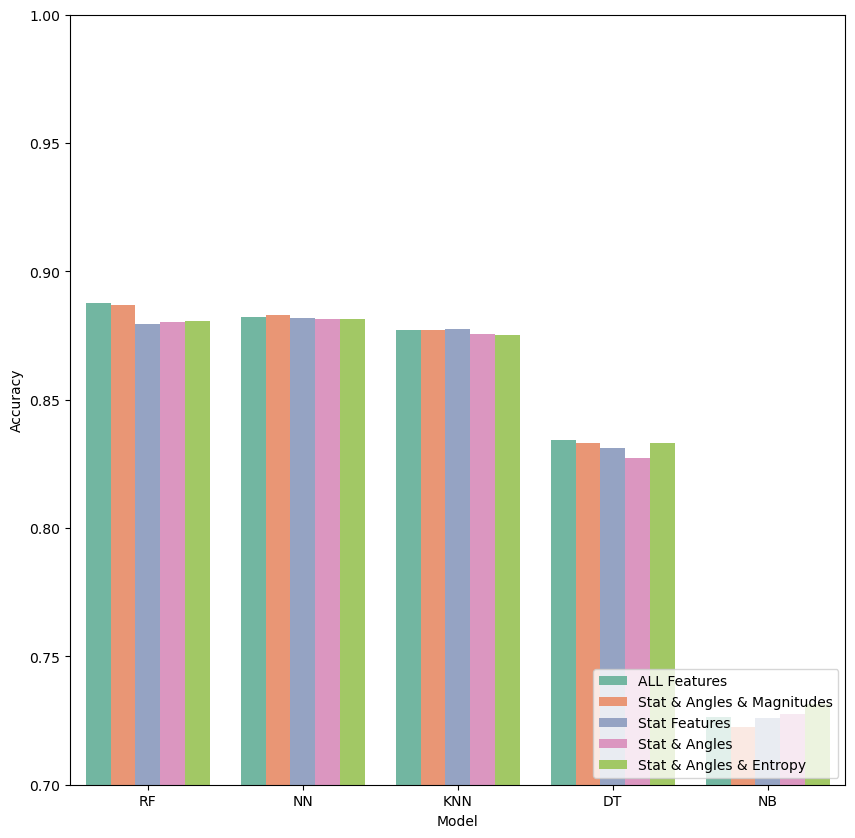

In [ ]:
score_df = score_df.sort_values(by="accuracy", ascending=False)  # Ensure sorting is applied

plt.figure(figsize=(10, 10))
sns.barplot(x="model", y="accuracy", hue="feature_set", data=score_df, palette="Set2")  # Fixed typo
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1)
plt.legend(loc="lower right")
plt.show()